In [1]:
import matplotlib.pyplot as plt
import numpy as np
from core import generate_shape
import matplotlib as mpl

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams["font.size"] = 16

In [3]:
np.random.seed(10)

cart_xs, cart_ys = generate_shape(3)
_cart_xs, _cart_ys = generate_shape(5)

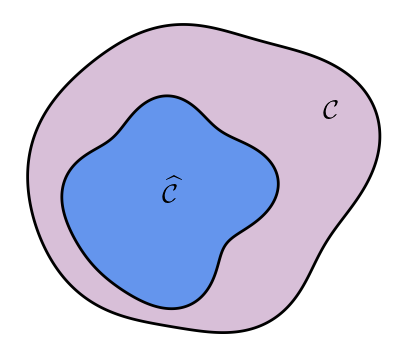

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x_offset, y_offset = -1.0, -0.6

ax.fill(0.1 * _cart_xs, 0.1 * _cart_ys, facecolor="thistle", edgecolor="black", linewidth=2)
ax.fill(0.1 * cart_xs + x_offset, 0.1 * cart_ys + y_offset, facecolor="cornflowerblue", edgecolor="black", linewidth=2)

ax.text(x_offset, y_offset, r"$\widehat{\mathcal{C}}$", fontsize=20)
ax.text(4.0, 2.0, r"$\mathcal{C}$", fontsize=20)

ax.axis("off")
ax.set_aspect("equal")

plt.savefig("imgs/demo.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()